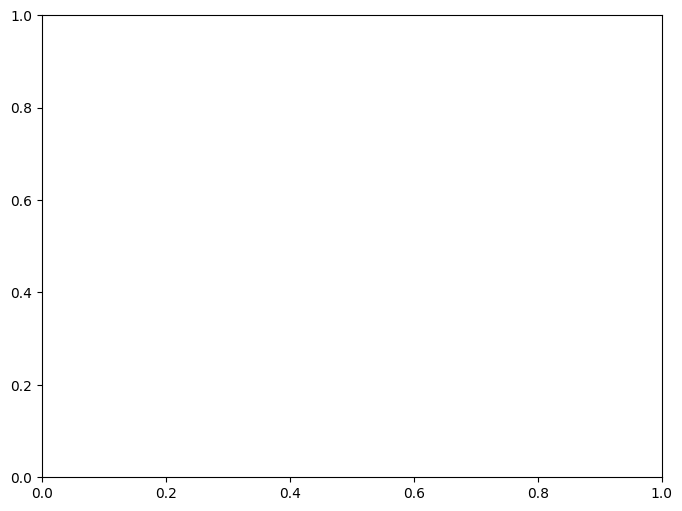

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('inf.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

In [3]:
df['Pathogen Test Result'].value_counts()

1    10028
0     8489
Name: Pathogen Test Result, dtype: int64

In [4]:
# Split the data into features and target variable
X = df.drop(['Pathogen Test Result'],axis = 1)
Y = df['Pathogen Test Result']

In [5]:
# Split the data into training and testing sets
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size= 0.3, random_state=2)

# SVM

In [6]:
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

In [7]:
# Train the model on the training set
classifier_svm = SVC(kernel='linear', random_state=2)  
classifier_svm.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=2)

In [8]:
# Use the trained model to make predictions on the testing set
y_pred = classifier_svm.predict(X_test)  
cm= confusion_matrix(Y_test, y_pred)  

In [9]:
score =accuracy_score(Y_test,y_pred)
print('accuracy on testing Data :',round(score*100 ,2),'%')

accuracy on testing Data : 70.66 %


In [10]:
print('for testing  : ' , round(precision_score(Y_test , y_pred)*100,2),'%')

for testing  :  77.94 %


In [11]:
print('for testing  : ' , round(recall_score(Y_test , y_pred)*100,2),'%')

for testing  :  63.57 %


In [12]:
print('for testing  : ' , round(f1_score(Y_test , y_pred)*100,2),'%')

for testing  :  70.03 %


In [13]:
# for sensitivity and specificity
tn_svm, fp_svm, fn_svm, tp_svm = cm.ravel()

In [14]:
specificity_svm = tn_svm/ (tn_svm+fp_svm)
print('specificity for data is : ',round(specificity_svm*100,2),'%')

specificity for data is :  78.95 %


In [15]:
sensitivity_svm = tp_svm / (tp_svm+fn_svm)
print('sensitivity for data is : ',round(sensitivity_svm*100,2),'%')

sensitivity for data is :  63.57 %


In [16]:
#ROC and AUC
fpr_svm, tpr_svm, threshold_svm = roc_curve(Y_test,y_pred)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [17]:
print('Area under curve : ',round(roc_auc_svm*100,2),'%')

Area under curve :  71.26 %


In [18]:
ax.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)

# ANN

In [19]:
# Split the data into training and testing sets
X_train_ann , X_test_ann , Y_train_ann , Y_test_ann = train_test_split(X,Y,test_size= 0.3, random_state=2)

In [20]:
# Create a neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train the model on the training set
model.fit(X_train_ann , Y_train_ann, epochs=100, batch_size=32)

Epoch 1/100
406/406 [==============================] - 1s 1ms/step - loss: 63.6264 - accuracy: 0.5151
Epoch 2/100
406/406 [==============================] - 1s 1ms/step - loss: 0.8011 - accuracy: 0.5199
Epoch 3/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7785 - accuracy: 0.5280
Epoch 4/100
406/406 [==============================] - 1s 1ms/step - loss: 0.8650 - accuracy: 0.5217
Epoch 5/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7970 - accuracy: 0.5307
Epoch 6/100
406/406 [==============================] - 0s 1ms/step - loss: 0.8217 - accuracy: 0.5270
Epoch 7/100
406/406 [==============================] - 0s 1ms/step - loss: 0.8122 - accuracy: 0.5308
Epoch 8/100
406/406 [==============================] - 0s 1ms/step - loss: 0.8311 - accuracy: 0.5390
Epoch 9/100
406/406 [==============================] - 1s 1ms/step - loss: 0.8026 - accuracy: 0.5358
Epoch 10/100
406/406 [==============================] - 1s 2ms/step - loss: 0.8565 - accur

406/406 [==============================] - 1s 1ms/step - loss: 0.7654 - accuracy: 0.5459
Epoch 82/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7821 - accuracy: 0.5460
Epoch 83/100
406/406 [==============================] - 1s 1ms/step - loss: 0.8057 - accuracy: 0.5458
Epoch 84/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7670 - accuracy: 0.5476
Epoch 85/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7767 - accuracy: 0.5419
Epoch 86/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7427 - accuracy: 0.5574
Epoch 87/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7909 - accuracy: 0.5426
Epoch 88/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7591 - accuracy: 0.5510
Epoch 89/100
406/406 [==============================] - 1s 1ms/step - loss: 0.7852 - accuracy: 0.5545
Epoch 90/100
406/406 [==============================] - 1s 2ms/step - loss: 0.7751 - accuracy: 

In [23]:
# Use the trained model to make predictions on the testing set
y_pred_ann = model.predict(X_test_ann)
y_pred_ann = np.round(y_pred_ann)

174/174 [==============================] - 0s 1ms/step


In [24]:
y_pred2_ann = model.predict(X_train_ann)
y_pred2_ann = np.round(y_pred_ann)

406/406 [==============================] - 0s 1ms/step


In [25]:
# Evaluate the accuracy of the model
accuracy_ann = accuracy_score(Y_test_ann, y_pred_ann)
print("Accuracy:", round(accuracy_ann*100,2),'%')

Accuracy: 47.46 %


In [26]:
cm_ann = confusion_matrix(Y_test, y_pred_ann)

In [27]:
# precision for testing
print('for testing : ' , round(precision_score(Y_test_ann , y_pred_ann)*100,2),'%')

for testing :  97.5 %


In [28]:
# Recall for testing 
print('for testing : ' , round(recall_score(Y_test_ann , y_pred_ann)*100,2),'%')

for testing :  2.6 %


In [29]:
# f1_score for testing 
print('for testing : ' , round(f1_score(Y_test_ann , y_pred_ann)*100,2),'%')

for testing :  5.07 %


In [30]:
# for sensitivity and specificity
tn_ann, fp_ann, fn_ann, tp_ann = cm_ann.ravel()

In [31]:
specificity = tn_ann / (tn_ann+fp_ann)
print('specificity for data is : ',round(specificity*100,2),'%')

specificity for data is :  99.92 %


In [32]:
sensitivity = tp_ann / (tp_ann+fn_ann)
print('sensitivity for data is : ',round(sensitivity*100,2),'%')

sensitivity for data is :  2.6 %


In [33]:
#ROC and AUC
fpr_ann, tpr_ann, threshold_ann = roc_curve(Y_test_ann,y_pred_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)

In [34]:
print('Area under curve : ',round(roc_auc_ann*100,2),'%')

Area under curve :  51.26 %


In [35]:

ax.plot(fpr_ann, tpr_ann, 'b', label = 'AUC = %0.2f' % roc_auc_ann)


# RANDOM FOREST 

In [36]:
# Create a random forest classifier object with 100 trees
rf = RandomForestClassifier(n_estimators=100)

In [37]:
# Train the model on the training set
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [38]:
# Use the trained model to make predictions on the testing set
y_pred = rf.predict(X_test)
y_pred2 = rf.predict(X_train)

In [39]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),'%')

Accuracy: 86.95 %


In [40]:
# precision for testing
print('for testing  : ' , round(precision_score(Y_test , y_pred)*100,2),'%')

for testing  :  89.85 %


In [41]:
# Recall for testing
print('for testing  : ' , round(recall_score(Y_test , y_pred)*100,2),'%')

for testing  :  85.44 %


In [42]:
# f1_score for testing
print('for testing  : ' , round(f1_score(Y_test , y_pred)*100,2),'%')

for testing  :  87.59 %


In [43]:
cm_rf = confusion_matrix(Y_test,y_pred)

In [44]:
# for sensitivity and specificity
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

In [45]:
specificity_rf = tn_rf / (tn_rf+fp_rf)
print('specificity for data is : ',round(specificity_rf*100,2),'%')

specificity for data is :  88.72 %


In [46]:
sensitivity_rf = tp_rf / (tp_rf+fn_rf)
print('sensitivity for data is : ',round(sensitivity_rf*100,2),'%')

sensitivity for data is :  85.44 %


In [47]:
#ROC and AUC
fpr_rf, tpr_rf, threshold_rf = roc_curve(Y_test,y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [48]:
print('Area under curve : ',round(roc_auc_rf*100,2),'%')

Area under curve :  87.08 %


In [49]:
ax.plot(fpr_rf,tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)

# KNN

In [50]:
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [51]:
Y_pred = classifier.predict(X_test)

In [52]:
cm= confusion_matrix(Y_test, Y_pred) 
cm

array([[1919,  642],
       [ 773, 2222]], dtype=int64)

In [53]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      2561
           1       0.78      0.74      0.76      2995

    accuracy                           0.75      5556
   macro avg       0.74      0.75      0.74      5556
weighted avg       0.75      0.75      0.75      5556



In [54]:
# for sensitivity and specificity
tn, fp, fn, tp = cm.ravel()

In [55]:
specificity = tn / (tn+fp)
print('specificity for data is : ',round(specificity*100,2),'%')

specificity for data is :  74.93 %


In [56]:
sensitivity = tp / (tp+fn)
print('sensitivity for data is : ',round(sensitivity*100,2),'%')

sensitivity for data is :  74.19 %


In [57]:
#ROC and AUC
fpr_knn, tpr_knn, threshold_knn = roc_curve(Y_test,Y_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [58]:
print('Area under curve : ',round(roc_auc_knn*100,2),'%')

Area under curve :  74.56 %


In [59]:
ax.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % roc_auc_knn)

# SVM - KNN

In [60]:
# Create SVM and KNN classifiers
svm = SVC(kernel='linear', C=1)
knn = KNeighborsClassifier(n_neighbors=5)

In [61]:
# Train classifiers on training data
svm.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [62]:
# Make predictions on testing data
svm_preds = svm.predict(X_test)
knn_preds = knn.predict(X_test)

In [63]:
# Combine predictions using majority voting
ensemble_preds = []
for i in range(len(X_test)):
    if svm_preds[i] == knn_preds[i]:
        ensemble_preds.append(svm_preds[i])
    else:
        ensemble_preds.append(svm_preds[i])  # You can also use knn_preds here


In [64]:
# Calculate accuracy of ensemble predictions
ensemble_acc = accuracy_score(Y_test, ensemble_preds)
print("Ensemble accuracy:", round(ensemble_acc*100,2),'%')

Ensemble accuracy: 70.66 %


In [65]:
cm = confusion_matrix(Y_test, ensemble_preds)
cm

array([[2022,  539],
       [1091, 1904]], dtype=int64)

In [66]:
# precision for testing
print('for testing : ' , round(precision_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  77.94 %


In [67]:
# Recall for testing 
print('for testing : ' , round(recall_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  63.57 %


In [68]:
# f1_score for testing 
print('for testing : ' , round(f1_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  70.03 %


In [69]:
# for sensitivity and specificity
tn_svmknn, fp_svmknn, fn_svmknn, tp_svmknn = cm.ravel()

In [70]:
specificity_svmknn = tn_svmknn / (tn_svmknn+fp_svmknn)
print('specificity for data is : ',round(specificity_svmknn*100,2),'%')

specificity for data is :  78.95 %


In [71]:
sensitivity_svmknn = tp_svmknn / (tp_svmknn+fn_svmknn)
print('sensitivity for data is : ',round(sensitivity_svmknn*100,2),'%')

sensitivity for data is :  63.57 %


In [72]:
#ROC and AUC
fpr_svmknn, tpr_svmknn, threshold_svmknn = roc_curve(Y_test,ensemble_preds)
roc_auc_svmknn = auc(fpr_svmknn, tpr_svmknn)

In [73]:
print('Area under curve : ',round(roc_auc_svmknn*100,2),'%')

Area under curve :  71.26 %


In [74]:
ax.plot(fpr_svmknn, tpr_svmknn, 'b', label = 'AUC = %0.2f' % roc_auc_svmknn)

# KNN - ANN

In [75]:
# Create KNN and ANN classifiers
knn = KNeighborsClassifier(n_neighbors=5)
ann = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

In [76]:
# Train classifiers on training data
knn.fit(X_train, Y_train)
ann.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(100, 50))

In [77]:
# Make predictions on testing data
knn_preds = knn.predict(X_test)
ann_preds = ann.predict(X_test)

In [78]:
# Combine predictions using majority voting
ensemble_preds = []
for i in range(len(X_test)):
    if knn_preds[i] == ann_preds[i]:
        ensemble_preds.append(knn_preds[i])
    else:
        ensemble_preds.append(knn_preds[i])  # You can also use ann_preds here

In [79]:
# Calculate accuracy of ensemble predictions
ensemble_acc = accuracy_score(Y_test, ensemble_preds)
print("Ensemble accuracy:", round(ensemble_acc*100,2),'%')

Ensemble accuracy: 74.53 %


In [80]:
cm = confusion_matrix(Y_test, ensemble_preds)
cm

array([[1919,  642],
       [ 773, 2222]], dtype=int64)

In [81]:
# precision for testing
print('for testing : ' , round(precision_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  77.58 %


In [82]:
# Recall for testing 
print('for testing : ' , round(recall_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  74.19 %


In [83]:
# f1_score for testing 
print('for testing : ' , round(f1_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  75.85 %


In [84]:
# for sensitivity and specificity
tn_knnann, fp_knnann, fn_knnann, tp_knnann = cm.ravel()

In [85]:
specificity_knnann = tn_knnann / (tn_knnann+fp_knnann)
print('specificity for data is : ',round(specificity_knnann*100,2),'%')

specificity for data is :  74.93 %


In [86]:
sensitivity_knnann = tp_knnann / (tp_knnann+fn_knnann)
print('sensitivity for data is : ',round(sensitivity_knnann*100,2),'%')

sensitivity for data is :  74.19 %


In [87]:
#ROC and AUC
fpr_knnann, tpr_knnann, threshold_knnann = roc_curve(Y_test,ensemble_preds)
roc_auc_knnann = auc(fpr_knnann, tpr_knnann)

In [88]:
print('Area under curve : ',round(roc_auc_knnann*100,2),'%')

Area under curve :  74.56 %


In [89]:
ax.plot(fpr_knnann, tpr_knnann, 'b', label = 'AUC = %0.2f' % roc_auc_knnann)

# RANDOMFOREST - ANN

In [90]:
# Create Random Forest and ANN classifiers
rf = RandomForestClassifier(n_estimators=100)
ann = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

In [91]:
# Train classifiers on training data
rf.fit(X_train, Y_train)
ann.fit(X_train, Y_train)

C:\Users\raman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50))

In [92]:
# Make predictions on testing data
rf_preds = rf.predict(X_test)
ann_preds = ann.predict(X_test)

In [93]:
# Combine predictions using majority voting
ensemble_preds = []
for i in range(len(X_test)):
    if rf_preds[i] == ann_preds[i]:
        ensemble_preds.append(rf_preds[i])
    else:
        ensemble_preds.append(rf_preds[i])  # You can also use ann_preds here


In [94]:
# Calculate accuracy of ensemble predictions
ensemble_acc = accuracy_score(Y_test, ensemble_preds)
print("Ensemble accuracy:", round(ensemble_acc*100,2),'%')

Ensemble accuracy: 86.88 %


In [95]:
cm = confusion_matrix(Y_test, ensemble_preds)
cm

array([[2270,  291],
       [ 438, 2557]], dtype=int64)

In [96]:
# precision for testing
print('for testing : ' , round(precision_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  89.78 %


In [97]:
# Recall for testing 
print('for testing : ' , round(recall_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  85.38 %


In [98]:
# f1_score for testing 
print('for testing : ' , round(f1_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  87.52 %


In [99]:
# for sensitivity and specificity
tn_rfann, fp_rfann, fn_rfann, tp_rfann = cm.ravel()

In [100]:
specificity_rfann = tn_rfann / (tn_rfann+fp_rfann)
print('specificity for data is : ',round(specificity_rfann*100,2),'%')

specificity for data is :  88.64 %


In [101]:
sensitivity_rfann = tp_rfann / (tp_rfann+fn_rfann)
print('sensitivity for data is : ',round(sensitivity_rfann*100,2),'%')

sensitivity for data is :  85.38 %


In [102]:
#ROC and AUC
fpr_rfann, tpr_rfann, threshold_rfann = roc_curve(Y_test,ensemble_preds)
roc_auc_rfann = auc(fpr_rfann, tpr_rfann)

In [103]:
print('Area under curve : ',round(roc_auc_rfann*100,2),'%')

Area under curve :  87.01 %


In [104]:
ax.plot(fpr_rfann, tpr_rfann, 'b', label = 'AUC = %0.2f' % roc_auc_rfann)

# RANDOMFOREST - SVM

In [105]:
# Create Random Forest and SVM classifiers
rf = RandomForestClassifier(n_estimators=100)
svm = SVC(kernel='linear', C=1)

In [106]:
# Train classifiers on training data
rf.fit(X_train, Y_train)
svm.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

In [107]:
# Make predictions on testing data
rf_preds = rf.predict(X_test)
svm_preds = svm.predict(X_test)

In [108]:
# Combine predictions using majority voting
ensemble_preds = []
for i in range(len(X_test)):
    if rf_preds[i] == svm_preds[i]:
        ensemble_preds.append(rf_preds[i])
    else:
        ensemble_preds.append(rf_preds[i])  # You can also use svm_preds here

In [109]:
# Calculate accuracy of ensemble predictions
ensemble_acc = accuracy_score(Y_test, ensemble_preds)
print("Ensemble accuracy:", round(ensemble_acc*100,2),'%')

Ensemble accuracy: 87.08 %


In [110]:
cm = confusion_matrix(Y_test, ensemble_preds)
cm

array([[2259,  302],
       [ 416, 2579]], dtype=int64)

In [111]:
# precision for testing
print('for testing : ' , round(precision_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  89.52 %


In [112]:
# Recall for testing 
print('for testing : ' , round(recall_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  86.11 %


In [113]:
# f1_score for testing 
print('for testing : ' , round(f1_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  87.78 %


In [114]:
# for sensitivity and specificity
tn_rfsvm, fp_rfsvm, fn_rfsvm, tp_rfsvm = cm.ravel()

In [115]:
specificity_rfsvm = tn_rfsvm / (tn_rfsvm+fp_rfsvm)
print('specificity for data is : ',round(specificity_rfsvm*100,2),'%')

specificity for data is :  88.21 %


In [116]:
sensitivity_rfsvm = tp_rfsvm / (tp_rfsvm+fn_rfsvm)
print('sensitivity for data is : ',round(sensitivity_rfsvm*100,2),'%')

sensitivity for data is :  86.11 %


In [117]:
#ROC and AUC
fpr_rfsvm, tpr_rfsvm, threshold_rfsvm = roc_curve(Y_test,ensemble_preds)
roc_auc_rfsvm = auc(fpr_rfsvm, tpr_rfsvm)

In [118]:
print('Area under curve : ',round(roc_auc_rfsvm*100,2),'%')

Area under curve :  87.16 %


In [119]:
ax.plot(fpr_rfsvm, tpr_rfsvm, 'b', label = 'AUC = %0.2f' % roc_auc_rfsvm)

# RANDOM FOREST - KNN 

In [120]:
# Train classifiers on training data
knn.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [121]:
# Make predictions on testing data
knn_preds = knn.predict(X_test)
rf_preds = rf.predict(X_test)

In [122]:
# Combine predictions using majority voting
ensemble_preds = []
for i in range(len(X_test)):
    if knn_preds[i] == rf_preds[i]:
        ensemble_preds.append(knn_preds[i])
    else:
        ensemble_preds.append(knn_preds[i])  # You can also use rf_preds here

In [123]:
# Calculate accuracy of ensemble predictions
ensemble_acc = accuracy_score(Y_test, ensemble_preds)
print("Ensemble accuracy:", round(ensemble_acc*100,2),'%')

Ensemble accuracy: 74.53 %


In [124]:
cm = confusion_matrix(Y_test, ensemble_preds)
cm

array([[1919,  642],
       [ 773, 2222]], dtype=int64)

In [125]:
# precision for testing
print('for testing : ' , round(precision_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  77.58 %


In [126]:
# Recall for testing 
print('for testing : ' , round(recall_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  74.19 %


In [127]:
# f1_score for testing 
print('for testing : ' , round(f1_score(Y_test , ensemble_preds)*100,2),'%')

for testing :  75.85 %


In [128]:
# for sensitivity and specificity
tn_rfknn, fp_rfknn, fn_rfknn, tp_rfknn = cm.ravel()

In [129]:
specificity_rfknn = tn_rfknn / (tn_rfknn+fp_rfknn)
print('specificity for data is : ',round(specificity_rfknn*100,2),'%')

specificity for data is :  74.93 %


In [130]:
sensitivity_rfknn = tp_rfknn / (tp_rfknn+fn_rfknn)
print('sensitivity for data is : ',round(sensitivity_rfknn*100,2),'%')

sensitivity for data is :  74.19 %


In [131]:
#ROC and AUC
fpr_rfknn, tpr_rfknn, threshold_rfknn = roc_curve(Y_test,ensemble_preds)
roc_auc_rfknn = auc(fpr_rfknn, tpr_rfknn)

In [132]:
print('Area under curve : ',round(roc_auc_rfknn*100,2),'%')

Area under curve :  74.56 %


In [133]:
ax.plot(fpr_rfknn, tpr_rfknn, 'b', label = 'AUC = %0.2f' % roc_auc_rfknn)

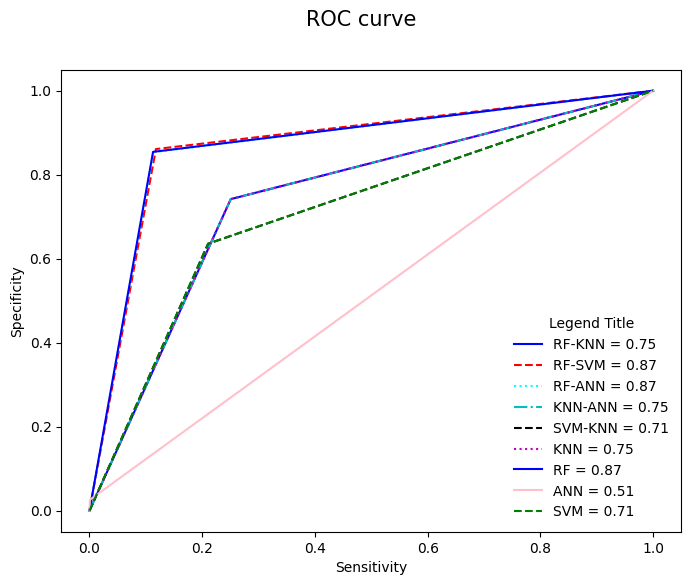

In [157]:
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.suptitle('ROC curve', fontsize=15)
ax.plot(fpr_rfknn, tpr_rfknn, 'b',linestyle = '-', label = 'RF-KNN = %0.2f' % roc_auc_rfknn)
ax.plot(fpr_rfsvm, tpr_rfsvm, 'r',linestyle = '--', label = 'RF-SVM = %0.2f' % roc_auc_rfsvm)
ax.plot(fpr_rfann, tpr_rfann, 'cyan',linestyle = 'dotted', label = 'RF-ANN = %0.2f' % roc_auc_rfann)
ax.plot(fpr_knnann, tpr_knnann, 'c',linestyle = 'dashdot', label = 'KNN-ANN = %0.2f' % roc_auc_knnann)
ax.plot(fpr_svmknn, tpr_svmknn, 'k',linestyle = '--', label = 'SVM-KNN = %0.2f' % roc_auc_svmknn)
ax.plot(fpr_knn, tpr_knn, 'm',linestyle = ':', label = 'KNN = %0.2f' % roc_auc_knn)
ax.plot(fpr_rf,tpr_rf, 'b', linestyle = 'solid',label = 'RF = %0.2f' % roc_auc_rf)
ax.plot(fpr_ann, tpr_ann, 'pink', linestyle = '-',label = 'ANN = %0.2f' % roc_auc_ann)
ax.plot(fpr_svm, tpr_svm, 'g',linestyle = '--', label = 'SVM = %0.2f' % roc_auc_svm)
plt.legend(loc="lower right", title="Legend Title", frameon=False)
ax.set_xlabel('Sensitivity')
ax.set_ylabel('Specificity')
plt.show()
